In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [59]:
def crop_mask(file):
    height = 880
    top=400
    polygons = np.array([[(250, height), (1500, height), (1200,top),(400, top)]])
    roi = np.zeros_like(file)
    cv2.fillPoly(roi, polygons, 255)
    mask_roi=cv2.bitwise_and(file, roi)
    return  mask_roi

def edgecanny(img,edgeThresh=20,kernel_size = 3,ratio=3):
    canny = cv2.Canny(img, edgeThresh, edgeThresh*ratio,kernel_size)
    return canny

def process(img,kernel=15):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gauss_filter = cv2.GaussianBlur(gray,(kernel,kernel),3)
    return gauss_filter

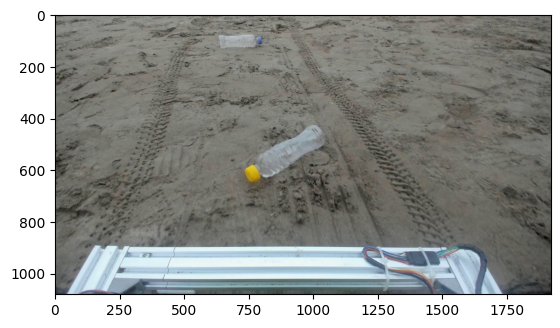

In [60]:
img=cv2.imread('imagenes/frame_0015.jpg')
imgshow=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgshow,cmap='gray')

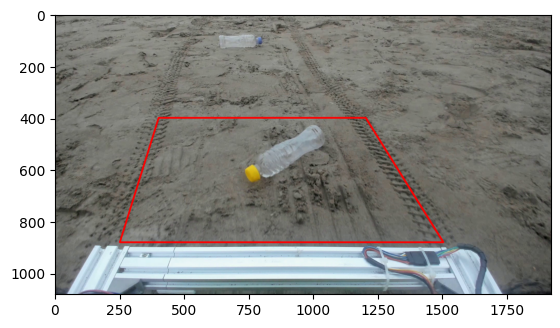

In [61]:
height = 880
top=400
polygons = np.array([[(250, height), (1500, height), (1200,top),(400, top)]])
n=imgshow.copy()
square=cv2.polylines(n, [polygons], isClosed=True, color=(255, 0, 0), thickness=5)
plt.imshow(n,cmap='gray')

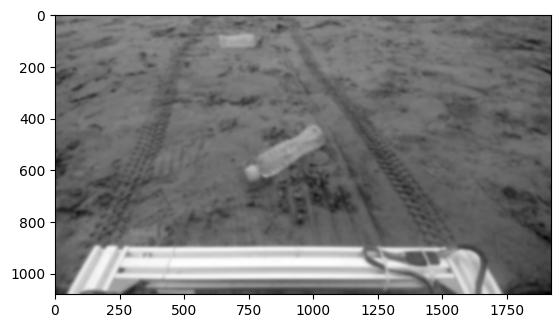

In [71]:
kernel=35
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gauss_filter = cv2.GaussianBlur(gray,(kernel,kernel),5)
plt.imshow(gauss_filter, cmap='gray')

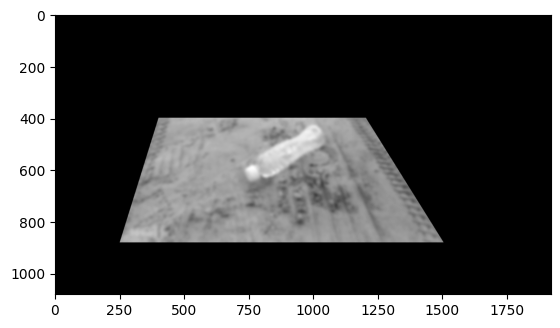

In [72]:
crop=crop_mask(gauss_filter)
plt.imshow(crop, cmap='gray')

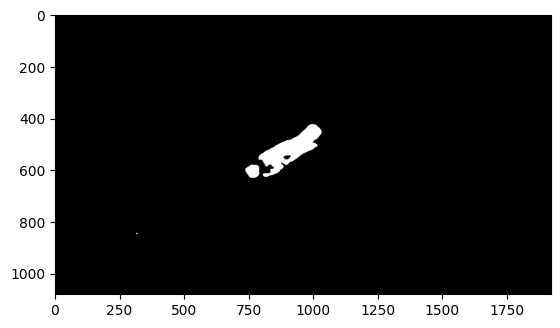

In [73]:
ret,bw = cv2.threshold(crop, 140, 255, cv2.THRESH_BINARY)
plt.imshow(bw, cmap='gray')

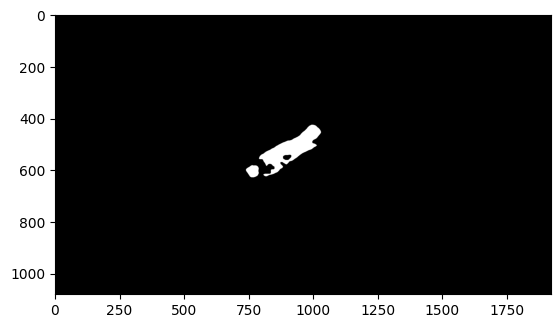

In [74]:
kernel = np.ones((3, 3), np.uint8) 
img_erosion = cv2.erode(bw, kernel, iterations=2) 
plt.imshow(img_erosion, cmap='gray')